<a href="https://colab.research.google.com/github/richardcruz98/Inteligencia-Artificial-I/blob/master/Laboratorios/Lab%202/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 02 Grupo 2 Regresión Lineal Multiple, Polinomica y Normal
Richard Ausberto Cruz Grimaldez

https://github.com/richardcruz98/Inteligencia-Artificial-I

In [2]:
# utilizado para manejos de directorios y rutas
import os

#utilizando para trabajar con datos en xlsx
import pandas as pd
import matplotlib.pyplot as plt

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

from sklearn.model_selection import train_test_split
import tabulate

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Separacion de datos

In [6]:
# Cargar datos
df = pd.read_csv(r'E:\Inteligencia Artificial I\IA repositorio\datasets\car_prices.csv')
df.head()
df.drop

df = df.drop(['SUSCEP_evaluación_de_susceptibilidad','Slope_pendiente'], axis=1).astype(float)


train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

X_regre_test = test_dataset.drop(['Rainfall_Caida_de_lluvia'], axis=1).values
y_regre_test = test_dataset['Rainfall_Caida_de_lluvia'].values


X_regre = train_dataset.drop(['Rainfall_Caida_de_lluvia'], axis=1).values
y_regre = train_dataset['Rainfall_Caida_de_lluvia'].values
m_regre = y_regre.size

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}{:>15s}{:>8s}{:>10s}{:>8s}{:>8s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'y'))
print('-'*200)
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}'.format(X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5], X_regre[i, 6], y_regre[i]))

  X[:,0] X[:, 1]   X[:, 2]        X[:, 3] X[:, 4]   X[:, 5] X[:, 6]       y
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   3.886   7.3961296000000.000        201.371         -8.623          1.000        221.624  69.487
   3.907   7.4222592000000.000        255.964         -8.219          0.000        226.761  66.698
   3.850   7.4041296000000.000        240.255         -8.890          0.000        207.089  68.141
   3.874   7.401     0.000         12.995         -5.867         16.000        219.900  66.045
   3.871   7.4215184000000.000        303.690         -9.471          0.000        222.063  66.648
   3.903   7.353-5184000000.000        335.556         -7.502          2.000        227.033  72.023
   3.889   7.3612592000000.000         99.462         -8.608          0.000        223.331  78.526
   3.933   7.406-3888000000.000  

Para normalizar

In [7]:
#normalizamos las caracteristicas
def  featureNormalize(X):
    X_norm = X.copy()
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    # Asegúrate de evitar la división por cero al verificar si sigma es cero
    sigma[sigma == 0] = 1
    
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
# llama featureNormalize con los datos cargados
X_norm_regre, mu_regre, sigma_regre = featureNormalize(X_regre)

# print(X_regre)
# print('Media calculada:', mu_regre)
# print('Desviación estandar calculada:', sigma_regre)
# print(X_norm_regre)

print('{:>8s}{:>8s}{:>10s}{:>8s}{:>8s}{:>10s}{:>8s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]'))
print('-'*200)
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.9f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}'.format(X_norm_regre[i, 0], X_norm_regre[i, 1], X_norm_regre[i, 2], X_norm_regre[i, 3], X_norm_regre[i, 4], X_norm_regre[i, 5], X_norm_regre[i, 6]))
    
    


  X[:,0] X[:, 1]   X[:, 2] X[:, 3] X[:, 4]   X[:, 5] X[:, 6]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  -0.195   0.6640.049905971          0.021          0.008          0.025          0.273
   0.553   1.4770.049905971          0.021          0.008          0.025          1.000
  -1.481   0.9210.049905971          0.021          0.008          0.025         -1.785
  -0.634   0.8010.049905971          0.021          0.008          0.025          0.029
  -0.753   1.4430.049905971          0.021          0.008          0.025          0.335
   0.413  -0.6530.049905971          0.021          0.008          0.025          1.039
  -0.085  -0.4310.049905971          0.021          0.008          0.025          0.514
   1.480   0.9810.049905971          0.021          0.008          0.025          1.505
  -1.401   0.2190.049905971       

In [9]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro', ms=10, mec='k')

  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

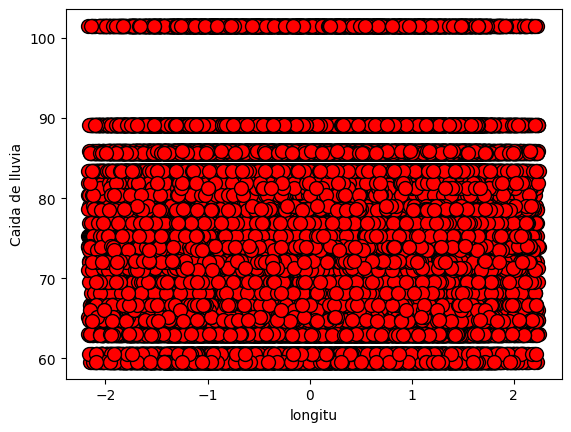

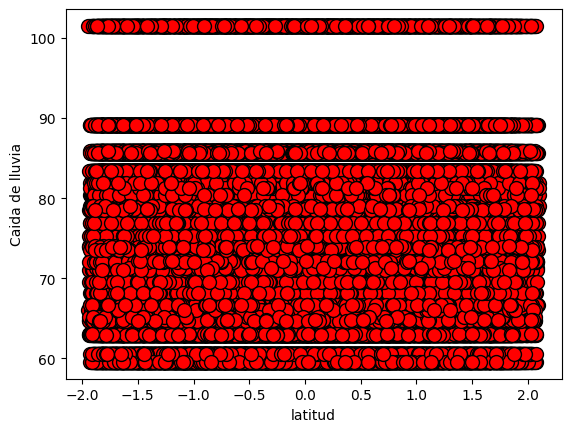

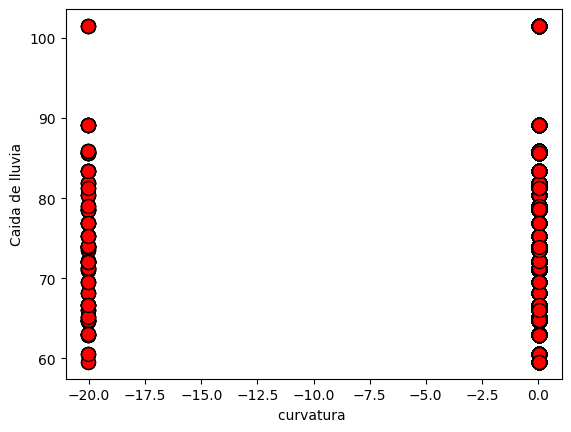

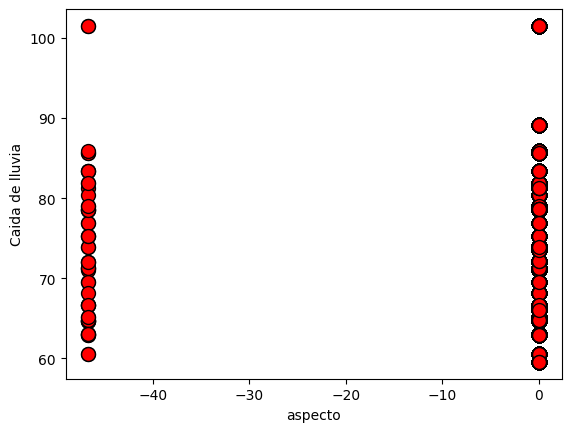

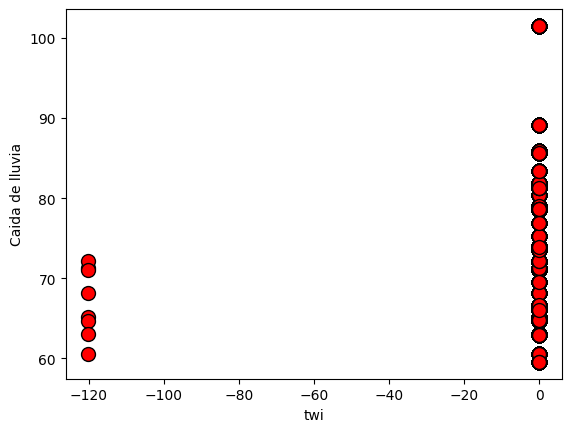

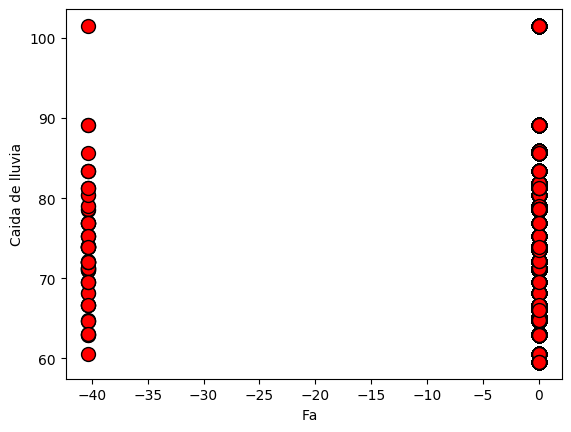

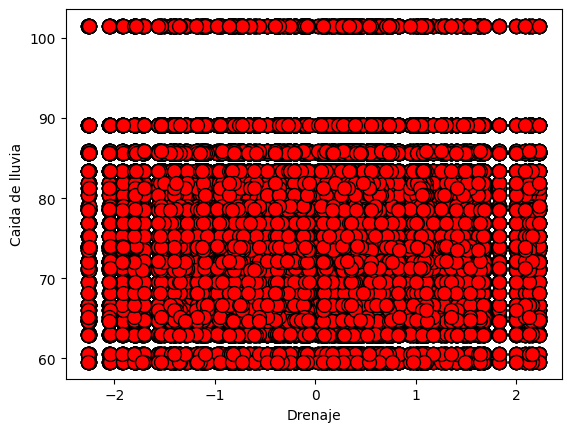

In [10]:
xlabel1 = "longitu"
xlabel2 = "latitud"
xlabel3 = "curvatura "
xlabel4 = "aspecto"
xlabel5 = "twi"
xlabel6 = "Fa  "
xlabel7 = "Drenaje"

ylabel1 = "Caida de lluvia"
graficarDatos(X_norm_regre[:, 0], y_regre, xlabel1, ylabel1)
graficarDatos(X_norm_regre[:, 1], y_regre, xlabel2, ylabel1)
graficarDatos(X_norm_regre[:, 2], y_regre, xlabel3, ylabel1)
graficarDatos(X_norm_regre[:, 3], y_regre, xlabel4, ylabel1)
graficarDatos(X_norm_regre[:, 4], y_regre, xlabel5, ylabel1)
graficarDatos(X_norm_regre[:, 5], y_regre, xlabel6, ylabel1)
graficarDatos(X_norm_regre[:, 6], y_regre, xlabel7, ylabel1)

In [11]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_ready_regre = np.concatenate([np.ones((m_regre, 1)), X_norm_regre], axis=1)

In [12]:
print('{:>8s}{:>8s}{:>10s}{:>8s}{:>8s}{:>10s}{:>8s}{:>8s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]'))
print('-'*200)
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.9f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}'.format(X_ready_regre[i, 0], X_ready_regre[i, 1], X_ready_regre[i, 2], X_ready_regre[i, 3], X_ready_regre[i, 4], X_ready_regre[i, 5], X_ready_regre[i, 6], X_ready_regre[i, 7]))

  X[:,0] X[:, 1]   X[:, 2] X[:, 3] X[:, 4]   X[:, 5] X[:, 6] X[:, 7]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.1950.664012514          0.050          0.021          0.008          0.025
   1.000   0.5531.476725133          0.050          0.021          0.008          0.025
   1.000  -1.4810.920658604          0.050          0.021          0.008          0.025
   1.000  -0.6340.800890429          0.050          0.021          0.008          0.025
   1.000  -0.7531.442505654          0.050          0.021          0.008          0.025
   1.000   0.413-0.653437416          0.050          0.021          0.008          0.025
   1.000  -0.085-0.431010804          0.050          0.021          0.008          0.025
   1.000   1.4800.980542692          0.050          0.021          0.008          0.025
   1.000  -1.4010.219159

In [13]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J


In [14]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

#### Seleccionando coheficientes de aprendizaje


Los valores de theta calculados son:
theta 1: 74.76831080900816
theta 2: 0.023290381359642107
theta 3: -0.005489691377323425
theta 4: -0.022050181321464312
theta 5: 0.008585597098990401
theta 6: 0.0651976976767698
theta 7: 0.038332412942295106
theta 8: -0.010303300962247079


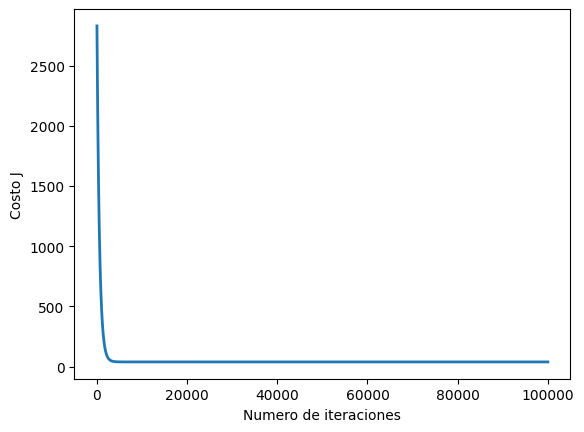

In [15]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0009 # alpha = 0.003
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta_regre = np.zeros(8)

theta_regre, J_history_regre = gradientDescentMulti(X_ready_regre, y_regre, theta_regre, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history_regre)), J_history_regre, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print("Los valores de theta calculados son:")
i = 0
for tht in theta_regre:
    i += 1
    print(f"theta {i}: {tht}")

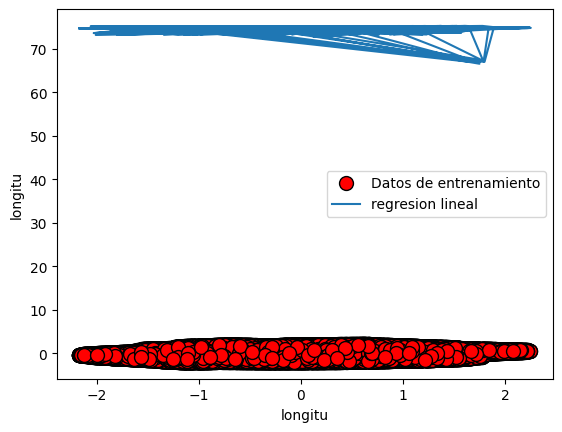

In [16]:
graficarDatos(X_ready_regre[:, 1], X_ready_regre[:, 2] , xlabel1, xlabel1)

pyplot.plot(X_ready_regre[:,1], np.dot(X_ready_regre, theta_regre), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [17]:

matriz_datos_regre = np.array([
        [1, 3.9090909, 6.98089, 1296120000, 45, 9453964233338, -43, 31366628302002],
        [1, 3.9090923, 6.98089, 1296004500, 50, 9453964233348, -60, 31384428302002],
        [1, 3.909166667, 7.442777778, -2599800000, 38.65985911, -4.703336764, 51, 220.421],
        [1, 3.9090933, 6.91089, 1296009800, 34.5, 9453964245398, 9, -67.3448322830200],
        [1, 2.9090234, 6.92089, 1296760000, 46, 9453964233668, -4, 31893228302002],
        [1, 3.90916666, 7.444577778, -25920054500, 38.65967911, -4.744936764, 511, 2332.333],
        [1, 3.9090123, 6.94589, 1296000100, 65, 9453964233878, -46.3142322830200, 2323.676],
        [1, 2.90909234, 6.97889, 1296003400, 43, 9453964236798, -47.33283228302002, 39.250],
        [1, 3.909166456, 7.442897778, -2592000000, 38.65923911, -4.707936764, 51, 235.421],
        [1, 2.9090234, 6.96589, 1296003100, 57, 9453964233458, -46, 3155322830]
])


#creamos un vector parta almacenar cada Y predicha
y_pre = []
matriz_datos_copy = matriz_datos_regre.copy()

# #Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos_regre:
    datos[1:] = (datos[1:] - mu_regre) / sigma_regre

# #Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_regre:
    y_pre.append(np.dot(datos, theta_regre))

matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

nombres_columnas = ['Longitud','Latitud','Curvatura','ASpecto','Twi','Fa','Drenaje','Caida de lluvia']

# # Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# # Imprimir la tabla
print(tabulate.tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|    |   Longitud |   Latitud |    Curvatura |   ASpecto |          Twi |       Fa |        Drenaje |   Caida de lluvia |
+====+============+===========+==============+===========+==============+==========+================+===================+
|  1 |    3.90909 |   6.98089 |  1.29612e+09 |   45      |  9.45396e+12 | -43      |    3.13666e+13 |      -4.57445e+10 |
+----+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|  1 |    3.90909 |   6.98089 |  1.296e+09   |   50      |  9.45396e+12 | -60      |    3.13844e+13 |      -4.57704e+10 |
+----+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|  1 |    3.90917 |   7.44278 | -2.5998e+09  |   38.6599 | -4.70334     |  51      |  220.421       |      74.771       |
+----+------------+-----

In [18]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

In [19]:
#haciendo x_test que es el 20% restante
m_ready_regre = len(y_regre_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready_regre, 1)), X_regre_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu_regre) / sigma_regre

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta_regre))

mse = mean_squared_error(y_predicha, y_regre_test)

#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 79.24145169089134
Raíz del Error Cuadrático Medio (RMSE) = 8.90176677356194


## Regresion Polinomial

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
df_poly = pd.read_excel("Pluvial_Flood_Dataset.xlsx")
df_poly.head()
df_poly.drop

df_poly = df_poly.drop(['SUSCEP_evaluación_de_susceptibilidad','Slope_pendiente'], axis=1).astype(float)

train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

X_poly_test = test_dataset.drop(['Rainfall_Caida_de_lluvia'], axis=1).values
y_poly_test = test_dataset['Rainfall_Caida_de_lluvia'].values

poly = PolynomialFeatures(degree=3)
# Seleccionamos las columnas para X y la columna 'price' para y

X_poly = poly.fit_transform(train_dataset.drop(['Rainfall_Caida_de_lluvia'], axis=1).values)
y_poly = train_dataset['Rainfall_Caida_de_lluvia'].values
m_poly = y_regre.size

print(len(X_poly[0]))

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}{:>15s}{:>8s}{:>10s}{:>8s}{:>8s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'y'))
print('-'*200)
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}'.format(X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5], X_regre[i, 6], y_regre[i]))

120
  X[:,0] X[:, 1]   X[:, 2]        X[:, 3] X[:, 4]   X[:, 5] X[:, 6]       y
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   3.886   7.3961296000000.000        201.371         -8.623          1.000        221.624  69.487
   3.907   7.4222592000000.000        255.964         -8.219          0.000        226.761  66.698
   3.850   7.4041296000000.000        240.255         -8.890          0.000        207.089  68.141
   3.874   7.401     0.000         12.995         -5.867         16.000        219.900  66.045
   3.871   7.4215184000000.000        303.690         -9.471          0.000        222.063  66.648
   3.903   7.353-5184000000.000        335.556         -7.502          2.000        227.033  72.023
   3.889   7.3612592000000.000         99.462         -8.608          0.000        223.331  78.526
   3.933   7.406-3888000000.0

In [22]:
#Usando la funcion de featureNormalice, pero solo los que estan en la primera columan ya que la primera columna es de unos
X_norm_poly, mu_poly, sigma_poly = featureNormalize(X_poly)
X_poli_ready = np.concatenate([np.ones((m_poly, 1)), X_norm_poly], axis=1)

print(len(sigma_poly))
print(len(mu_poly))


120
120


In [23]:
# Generar un vector aleatorio entre 0 y 1 con longitud 190
theta_poly = np.random.rand(len(X_poli_ready[1]))
theta_poly2 = np.random.rand(len(X_poli_ready[1]))
print(theta_poly.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"########################################################################################################")
print(f"con theta:{ theta_poly } se obtiene un costo de: {calcularCosto(X_poli_ready, y_poly, theta_poly)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_poly2 } se obtiene un costo de: {calcularCosto(X_poli_ready, y_poly, theta_poly2)}")

121
########################################################################################################
con theta:[0.31105306 0.55204747 0.61921338 0.97456835 0.91037624 0.36934231
 0.60530728 0.35892976 0.99253854 0.71796992 0.14703385 0.45298025
 0.50339391 0.38687833 0.7684821  0.5540599  0.3814768  0.89566236
 0.57973054 0.47334053 0.88804147 0.96705947 0.72659122 0.03876072
 0.15046229 0.96869148 0.39273202 0.68289827 0.08670501 0.91952014
 0.81806096 0.84722466 0.07628877 0.41319839 0.56625949 0.14693765
 0.06122012 0.17337527 0.20788923 0.66386838 0.52335696 0.02021658
 0.95348842 0.71816257 0.28736747 0.18392091 0.67195903 0.12497757
 0.56739044 0.00700353 0.23872765 0.12519289 0.58707733 0.23558152
 0.21028395 0.72578106 0.28080878 0.23145912 0.56975933 0.00528264
 0.64757    0.08534181 0.29642058 0.62970077 0.0961077  0.49113708
 0.40477353 0.95165195 0.71264318 0.59448297 0.59543204 0.75186489
 0.99409942 0.89269933 0.39365266 0.31674816 0.8937426  0.86606919
 0.5843824

In [24]:
#creamos un theta con 190 columnas de ceros
theta_poli = np.zeros(len(X_poli_ready[1]))

print(len(X_poli_ready[1]))
print(theta_poli.shape[0])

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite_poli = 1000
alpha_poli = 0.009

theta_poli, J_historico_poli = gradientDescentMulti(X_poli_ready, y_poly, theta_poli, alpha_poli, num_ite_poli)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_poli:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_poli[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

121
121
########################################################################################################
Los valores de theta calculados son:
theta 1: 74.75945206700106
theta 2: 0.0
theta 3: 0.005273018006230389
theta 4: -0.0029448859232278674
theta 5: -0.0024359843874219938
theta 6: 0.0007799290328345386
theta 7: 0.001447261437831623
theta 8: 0.00445038965804151
theta 9: -0.0018852604506846371
theta 10: 0.005833616131844308
theta 11: 0.002914371192902445
theta 12: -0.0031792567536649222
theta 13: -0.0013093858001705862
theta 14: 0.0014544143998072375
theta 15: 0.003175894658232884
theta 16: -0.0019170389597551228
theta 17: -0.0025497605226441067
theta 18: -0.0024359843874507763
theta 19: 0.0007799290328358
theta 20: 0.001447261437832643
theta 21: 0.004450389658043881
theta 22: -0.002758562375685791
theta 23: 0.00243598438744033
theta 24: 0.0019084254894696446
theta 25: -0.006373951467146265
theta 26: 0.005853290178949541
theta 27: 0.0008005658965817381
theta 28: -0.00077992903

[2784.5704467670344, 2735.3809254411617, 2687.073114822905, 2639.6310814035346, 2593.0392460134603, 2547.2823400777606, 2502.3453838117284, 2458.213673652852, 2414.872773754787, 2372.3085093770087, 2330.5069612287652, 2289.4544603385243, 2249.1375832424933, 2209.5431473868816, 2170.6582066869555, 2132.470047210414, 2094.9661829657, 2058.134351783127, 2021.962511280882, 1986.4388349105618, 1951.5517080783193, 1917.2897243387379, 1883.6416816590938, 1850.5965787520931, 1818.1436114754024, 1786.272169296474, 1754.9718318212963, 1724.2323653857588, 1694.0437197084293, 1664.3960246035465, 1635.2795867531045, 1606.6848865369307, 1578.602574919674, 1551.0234703936765, 1523.938555976693, 1497.338976263469, 1471.2160345302104, 1445.5611898909588, 1420.366054504974, 1395.622390834164, 1371.3221089497029, 1347.457263886908, 1324.0200530475463, 1301.0028136486922, 1278.3980202173132, 1256.198282129761, 1234.3963411953548, 1212.9850692832738, 1191.9574659919808, 1171.306656360406, 1151.025888620154

Text(0, 0.5, 'Costo J')

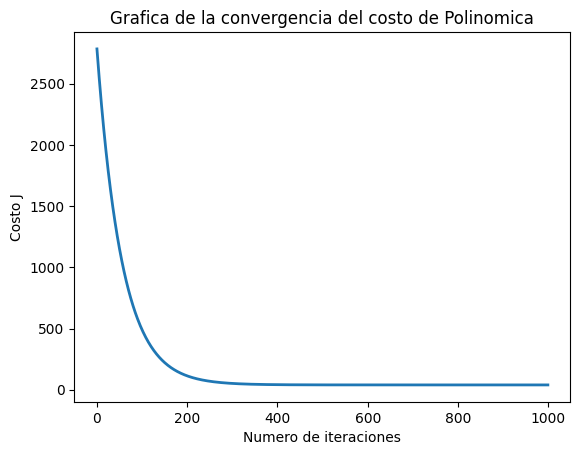

In [25]:
pyplot.plot(np.arange(len(J_historico_poli)), J_historico_poli, lw=2)
print(J_historico_poli)
pyplot.title("Grafica de la convergencia del costo de Polinomica")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

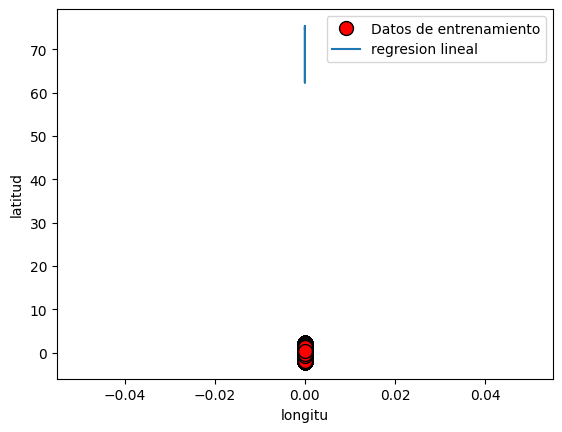

In [26]:
graficarDatos(X_poli_ready[:, 1], X_poli_ready[:, 2], xlabel1, xlabel2)
pyplot.plot(X_poli_ready[:, 1], np.dot(X_poli_ready, theta_poli), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [27]:
matriz_datos_poly = np.array([
        [3.9090909, 6.98089, 1296120000, 45, 9453964233338, -43, 31366628302002],
        [3.9090923, 6.98089, 1296004500, 50, 9453964233348, -60, 31384428302002],
        [3.909166667, 7.442777778, -2599800000, 38.65985911, -4.703336764, 51, 220.421],
        [3.9090933, 6.91089, 1296009800, 34.5, 9453964245398, 9, -67.3448322830200],
        [2.9090234, 6.92089, 1296760000, 46, 9453964233668, -4, 31893228302002],
        [3.90916666, 7.444577778, -25920054500, 38.65967911, -4.744936764, 511, 2332.333],
        [3.9090123, 6.94589, 1296000100, 65, 9453964233878, -46.3142322830200, 2323.676],
        [2.90909234, 6.97889, 1296003400, 43, 9453964236798, -47.33283228302002, 39.250],
        [3.909166456, 7.442897778, -2592000000, 38.65923911, -4.707936764, 51, 235.421],
        [2.9090234, 6.96589, 1296003100, 57, 9453964233458, -46, 3155322830]
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []
matriz_datos_copy = matriz_datos_poly.copy()

# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly_test = PolynomialFeatures(degree = 3)
matriz_datos_poly = poly_test.fit_transform(matriz_datos_poly)

print(len(mu_poly))
print(len(sigma_poly))
print(len(matriz_datos_poly[0]))
print(len(theta_poli))


# #Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos_poly:
    datos = (datos - mu_poly) / sigma_poly
    
# #Calculamos la Y predicha de los 11 ejemplos de prediccion
matriz_datos_poly = np.concatenate([np.ones((matriz_datos_poly.shape[0], 1)), matriz_datos_poly], axis=1)

for datos in matriz_datos_poly:
    y_pre.append(np.dot(datos, theta_poli))

matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

nombres_columnas = ['Longitud','Latitud','Curvatura','ASpecto','Twi','Fa','Drenaje','Caida de lluvia']

# # Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# # Imprimir la tabla
print(tabulate.tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

120
120
120
121
+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|   Longitud |   Latitud |    Curvatura |   ASpecto |          Twi |       Fa |        Drenaje |   Caida de lluvia |
+============+===========+==============+===========+==============+==========+================+===================+
|    3.90909 |   6.98089 |  1.29612e+09 |   45      |  9.45396e+12 | -43      |    3.13666e+13 |       1.0511e+38  |
+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|    3.90909 |   6.98089 |  1.296e+09   |   50      |  9.45396e+12 | -60      |    3.13844e+13 |       1.05286e+38 |
+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|    3.90917 |   7.44278 | -2.5998e+09  |   38.6599 | -4.70334     |  51      |  220.421       |       4.2805e+25  |
+------------+-----------+--------------+-------

In [28]:
#haciendo x_test que es el 20% restante
m_ready_poli = len(y_poly_test)

# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly_test = PolynomialFeatures(degree=3)

datos_poli_test = poly_test.fit_transform(X_poly_test)
# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in datos_poli_test:
    datos_test = (datos_test - mu_poly) / sigma_poly

datos_poli_test = np.concatenate([np.ones((datos_poli_test.shape[0], 1)), datos_poli_test], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha_poli = []
for data_test_ready in datos_poli_test:
    y_predicha_poli.append(np.dot(data_test_ready, theta_poli))

mse = mean_squared_error(y_predicha_poli, y_poly_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 1.6568966523114937e+224
Raíz del Error Cuadrático Medio (RMSE) = 1.2872049768049741e+112


<a id="section7"></a>
### Ecuacion de la Normal


In [29]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)

    return theta

In [30]:
# Cargamos los datos utilizando pandasd
data = pd.read_excel('Pluvial_Flood_Dataset.xlsx')

data
data.info()

data= data.drop(['SUSCEP_evaluación_de_susceptibilidad','Slope_pendiente'], axis=1).astype(float)


# Seleccionar aleatoriamente 20,000 ejemplos
sampled_dataset = data.sample(n=20000, random_state=42)

train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

X_ecuaNorma_test = test_dataset.drop(['Rainfall_Caida_de_lluvia'], axis=1).values
y_ecuaNorma_test = test_dataset['Rainfall_Caida_de_lluvia'].values

# Seleccionamos las columnas para X y la columna 'Rainfall_Caida_de_lluvia' para y
X_ecuaNorma = train_dataset.drop(['Rainfall_Caida_de_lluvia'], axis=1).values
y_ecuaNorma = train_dataset['Rainfall_Caida_de_lluvia'].values
m_ecuaNorma = len(y_ecuaNorma)


X_ren = np.concatenate([np.ones((m_ecuaNorma, 1)), X_ecuaNorma], axis=1)

#Imprimimos X_ready
# print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
#     'X_ren[:,0]', '  X_ren[:, 1]', '  X_ren[:, 2]', '  X_ren[:, 3]', '  X_ren[:, 4]', '  X_ren[:, 5]', '  X_ren[:, 6]', '  X_ren[:, 7]'))
# print('-' * 260)

# for i in range(20):
#     print('{:10.0f}{:12.0f}{:12.0f}{:15.0f}{:14.0f}{:12.0f}{:13.0f}{:14.0f}'.format(
#         X_ren[i, 0], X_ren[i, 1], X_ren[i, 2], X_ren[i, 3], X_ren[i, 4], X_ren[i, 5], X_ren[i, 6], X_ren[i, 7]
#     ))
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   X_longitud                            144401 non-null  float64
 1   Y_lalitud                             144401 non-null  float64
 2   Slope_pendiente                       144119 non-null  float64
 3   Curvature _Curvatura                  144401 non-null  float64
 4   Aspect_Aspecto                        144401 non-null  float64
 5   TWI                                   144401 non-null  float64
 6   FA                                    144401 non-null  float64
 7   Drainage_Drenaje                      144401 non-null  float64
 8   Rainfall_Caida_de_lluvia              144401 non-null  float64
 9   SUSCEP_evaluación_de_susceptibilidad  144401 non-null  object 
dtypes: float64(9), object(1)
memory usage: 11.0+ MB


Calculando thetha


In [31]:
# Calculamos thea haciendo uso de la funcion
theta2 = calcularThethaEcuacionNormal(X_ren, y_ecuaNorma);

print(f"########################################################################################################")

print("Los valores de theta usando la ecuacion de la normal es calculados son:")
i = 0
for tht2 in theta2:
    i += 1
    print(f"theta {i}: {tht2}")
print(f"########################################################################################################")

########################################################################################################
Los valores de theta usando la ecuacion de la normal es calculados son:
theta 1: 973.4930023752571
theta 2: -109.47111196083178
theta 3: -62.98023352720989
theta 4: -9.343580604417953e-40
theta 5: -5.791609372709038e-39
theta 6: 3.619968370546262e-38
theta 7: -4.750200097990345e-39
theta 8: -0.03658284687069843
########################################################################################################


Ejemplos de Predicciones haciendo uso de la Ecuacion de la normal

In [32]:
matriz_datos_ecuaNorma = np.array([
        [1,3.9090909, 6.98089, 1296120000, 45, 9453964233338, -43, 31366628302002],
        [1,3.9090923, 6.98089, 1296004500, 50, 9453964233348, -60, 31384428302002],
        [1,3.909166667, 7.442777778, -2599800000, 38.65985911, -4.703336764, 51, 220.421],
        [1,3.9090933, 6.91089, 1296009800, 34.5, 9453964245398, 9, -67.3448322830200],
        [1,2.9090234, 6.92089, 1296760000, 46, 9453964233668, -4, 31893228302002],
        [1,3.90916666, 7.444577778, -25920054500, 38.65967911, -4.744936764, 511, 2332.333],
        [1,3.9090123, 6.94589, 1296000100, 65, 9453964233878, -46.3142322830200, 2323.676],
        [1,2.90909234, 6.97889, 1296003400, 43, 9453964236798, -47.33283228302002, 39.250],
        [1,3.909166456, 7.442897778, -2592000000, 38.65923911, -4.707936764, 51, 235.421],
        [1,2.9090234, 6.96589, 1296003100, 57, 9453964233458, -46, 3155322830]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_ecua = []
#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_ecuaNorma:
    y_pre_ecua.append(np.dot(datos, theta2).astype(int))

matriz_datos_ecuaNorma = np.column_stack((matriz_datos_ecuaNorma, y_pre_ecua))

nombres_columnas = ['Longitud','Latitud','Curvatura','ASpecto','Twi','Fa','Drenaje','Caida de lluvia']

# # Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_ecuaNorma.tolist()

# # Imprimir la tabla
print(tabulate.tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|    |   Longitud |   Latitud |    Curvatura |   ASpecto |          Twi |       Fa |        Drenaje |   Caida de lluvia |
+====+============+===========+==============+===========+==============+==========+================+===================+
|  1 |    3.90909 |   6.98089 |  1.29612e+09 |   45      |  9.45396e+12 | -43      |    3.13666e+13 |      -2.14748e+09 |
+----+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|  1 |    3.90909 |   6.98089 |  1.296e+09   |   50      |  9.45396e+12 | -60      |    3.13844e+13 |      -2.14748e+09 |
+----+------------+-----------+--------------+-----------+--------------+----------+----------------+-------------------+
|  1 |    3.90917 |   7.44278 | -2.5998e+09  |   38.6599 | -4.70334     |  51      |  220.421       |      68           |
+----+------------+-----

C:\Users\Asus-Rog\AppData\Local\Temp\ipykernel_3960\477004822.py:18: RuntimeWarning: invalid value encountered in cast
  y_pre_ecua.append(np.dot(datos, theta2).astype(int))


validacion

In [33]:
m_ready = len(y_ecuaNorma_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_ecuaNorma_test], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta2))

#calculamos el error cuadratico medio:
mse = mean_squared_error(y_predicha, y_ecuaNorma_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 98.10625711035647
Raíz del Error Cuadrático Medio (RMSE) = 9.904860277174862
